<a href="https://colab.research.google.com/github/YashSharma019/image-classification/blob/main/imageclassificationusingcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train), (X_test,y_test)= datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:6]

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [ ]:
y_test=y_test.reshape(-1,)

In [ ]:
classes=['airplane','automobile','bird','cat','deer', 'dog', 'frog','horse','ship','truck']

In [ ]:
def plot_sample(X_train, y_train,n=6):
  """

  Args:
    X_train:
    y_train:
    n:
  """

In [ ]:
def plot_sample(X_train,y_train, n=200):
  """

  Args:
    X_train:
    y_train:
    n:
  """

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.1005 - loss: nan
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 87ms/step - accuracy: 0.1003 - loss: nan
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 87ms/step - accuracy: 0.1002 - loss: nan
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.1023 - loss: nan
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 86ms/step - accuracy: 0.1013 - loss: nan


In [ ]:

import numpy as np
from sklearn.metrics import classification_report

# Assuming y_test, y_pred, and y_pred_classes are already defined
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification report:\n', classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.61      0.52      0.56      1000
           1       0.59      0.63      0.61      1000
           2       0.34      0.46      0.39      1000
           3       0.36      0.38      0.37      1000
           4       0.60      0.15      0.25      1000
           5       0.50      0.28      0.36      1000
           6       0.49      0.62      0.54      1000
           7       0.49      0.62      0.55      1000
           8       0.63      0.65      0.64      1000
           9       0.50      0.65      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.48     10000
weighted avg       0.51      0.50      0.48     10000



In [ ]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

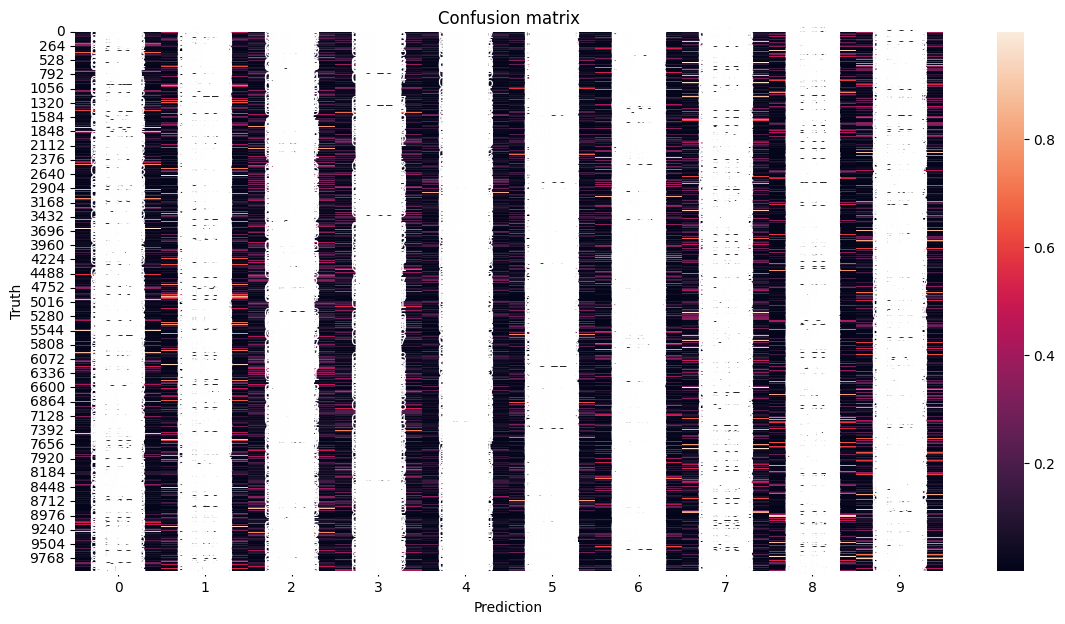

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [ ]:
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
                  layers.Dense(64, activation='relu'),
                  layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train, epochs=7)

Epoch 1/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.3723 - loss: 1.7176
Epoch 2/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.5837 - loss: 1.1813
Epoch 3/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6421 - loss: 1.0245
Epoch 4/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6728 - loss: 0.9397
Epoch 5/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7033 - loss: 0.8617
Epoch 6/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.7211 - loss: 0.8118
Epoch 7/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7361 - loss: 0.7619


In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

In [ ]:
 y_test[:5]

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
plot_sample(X_test, y_test,9)

In [ ]:
classes[y_classes[]]5